## Exploring the Where it Pays to Attend College Dataset

**Abdullah Sahin** - **19 November 2018** <a id="0"></a>

* [Introduction](#1)
* [Import Modules](#2)
* [Exploring the First Data](#3)
    * [Change Columns Name](#4)
    * [Convert Data Type](#5)
    * [Visualization](#6)
        * [Undergraduate Major Salary](#7)
        * [Start Career to Middle Career](#8)
*  [Import Second Data](#9)
    * [Visualize the Empty Data](#10)
    * [Formulas for null values](#11)
    * [Change Data Type](#12)
    * [Fill null values with Formula](#13)
    * [Visualization](#14)
        * [Compare Schools](#15)
        * [School Types](#16)
        * [Salary Statistics](#17)
*  [Import Third Data](#18)
    * [Change Columns Name](#19)
    * [Convert Data Type](#20)
    * [Fill null values with Formula](#21)
    * [Visualization](#22)
        * [Region & School Visualization](#23)
        * [Average starting salary for the states](#24)
        * [Compare the pay for the schools](#25)
* [Conclusion](#26)

## INTRODUCTION <a id="1"></a>
<mark>[Return Contents](#0)
<hr>
    
In this notebook, let us try and explore the data given for About college.

What do we do in this notebook?
* we will fill the null data with a formula.
* we're going to plotly visualize the data.

and **more**.

### **Import Modules** <a id="2"></a>
<mark>[Return Contents](#0)
<hr>

Let us first import the necessary modules.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import graph objects as "go"
import plotly.graph_objs as go

# import missingno library
import missingno as msno

import os
#print(os.listdir("../input"))

let's list the files in the input folder.

In [ ]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

### **Exploring the First Data** <a id="3"></a>
<mark>[Return Contents](#0)
<hr>
firstly, let's explore the degrees that pay back.

In [5]:
degrees_df = pd.read_csv('./input/degrees-that-pay-back.csv')
degrees_df.shape

(50, 8)

In [6]:
degrees_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### **Change Columns Name** <a id="4"></a>
<mark>[Return Contents](#0)
<hr>
I need change to coloumns name because columns name are very complex.

In [7]:
degrees_df.columns = ['major','starting','midcareer','starttomid','mid_p10','mid_p25','mid_p75','mid_p90']

let's see the columns datatype.

In [8]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   major       50 non-null     object 
 1   starting    50 non-null     object 
 2   midcareer   50 non-null     object 
 3   starttomid  50 non-null     float64
 4   mid_p10     50 non-null     object 
 5   mid_p25     50 non-null     object 
 6   mid_p75     50 non-null     object 
 7   mid_p90     50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


### Convert Data Type <a id="5"></a>
<mark>[Return Contents](#0)
<hr>
some columns need change to data type. For example, starting column is data type object but I'm going to convert data type. You must also convert other columns.

In [10]:
someColumns = ['starting', 'midcareer', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for column in someColumns:
    degrees_df[column] = degrees_df[column].str.replace("$","")
    degrees_df[column] = degrees_df[column].str.replace(",","")
    degrees_df[column] = pd.to_numeric(degrees_df[column])

<ipython-input-10-ef01b9431d5e>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [11]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   major       50 non-null     object 
 1   starting    50 non-null     float64
 2   midcareer   50 non-null     float64
 3   starttomid  50 non-null     float64
 4   mid_p10     50 non-null     float64
 5   mid_p25     50 non-null     float64
 6   mid_p75     50 non-null     float64
 7   mid_p90     50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


In [12]:
degrees_df.head()

,major,starting,midcareer,starttomid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


Now, I'm going to sort the major by the starting salaries.

In [13]:
sorted = degrees_df.sort_values('starting', ascending=False)
sorted.head()

,major,starting,midcareer,starttomid,mid_p10,mid_p25,mid_p75,mid_p90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


### **Visualization** <a id="6"></a>
<mark>[Return Contents](#0)
<hr>
### Undergraduate Major Salaries <a id="7"></a>


Now, I converted to data type and name for columns then I am visualizing the data. First, I'm going to show you the salaries for each Undergraduate Major.

In [14]:
# Bar Chart
trace1 = go.Bar(
    x=sorted.major,
    y=sorted.starting,
    name='Starting Median Salary'
)
trace2 = go.Bar(
    x=sorted.major,
    y=sorted.midcareer,
    name='Mid-Career Median Salary'
)
trace3 = go.Bar(
    x=sorted.major,
    y=sorted.mid_p10,
    name='Mid-Career 10th Percentile Salary'
)
trace4 = go.Bar(
    x=sorted.major,
    y=sorted.mid_p25,
    name='Mid-Career 25th Percentile Salary'
)
trace5 = go.Bar(
    x=sorted.major,
    y=sorted.mid_p75,
    name='Mid-Career 75th Percentile Salary'
)
trace6 = go.Bar(
    x=sorted.major,
    y=sorted.mid_p90,
    name='Mid-Career 90th Percentile Salary'
)

data = [trace1,trace2,trace3,trace4,trace5,trace6]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Start Career to Middle Career <a id="8"></a>
<mark>[Return Contents](#0)
<hr>
For Undergradute Major, I will list the salary change from start career to middle career.

In [15]:
sorted_starttomid = degrees_df.sort_values('starttomid', ascending=False)
sorted_starttomid.head()

,major,starting,midcareer,starttomid,mid_p10,mid_p25,mid_p75,mid_p90
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


Now I'm going to visualize this sequence.

In [16]:
# Line Chart
trace = go.Scatter(
    x = sorted_starttomid.major,
    y = sorted_starttomid.starttomid
)
layout = dict(title = 'Percent change from Starting to Mid-Career Salary',
              xaxis= dict(title= '',ticklen= 5,zeroline= False)
             )
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### **Import Second Data** <a id="9"></a>
<mark>[Return Contents](#0)
<hr>
let's explore our second set of data.

In [17]:
salariesByCollege_df = pd.read_csv('./input/salaries-by-college-type.csv')
salariesByCollege_df.shape

(269, 8)

In [18]:
salariesByCollege_df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


### **Visualize the Empty Data** <a id="10"></a>
<mark>[Return Contents](#0)
<hr>
Let's visualize the empty data.

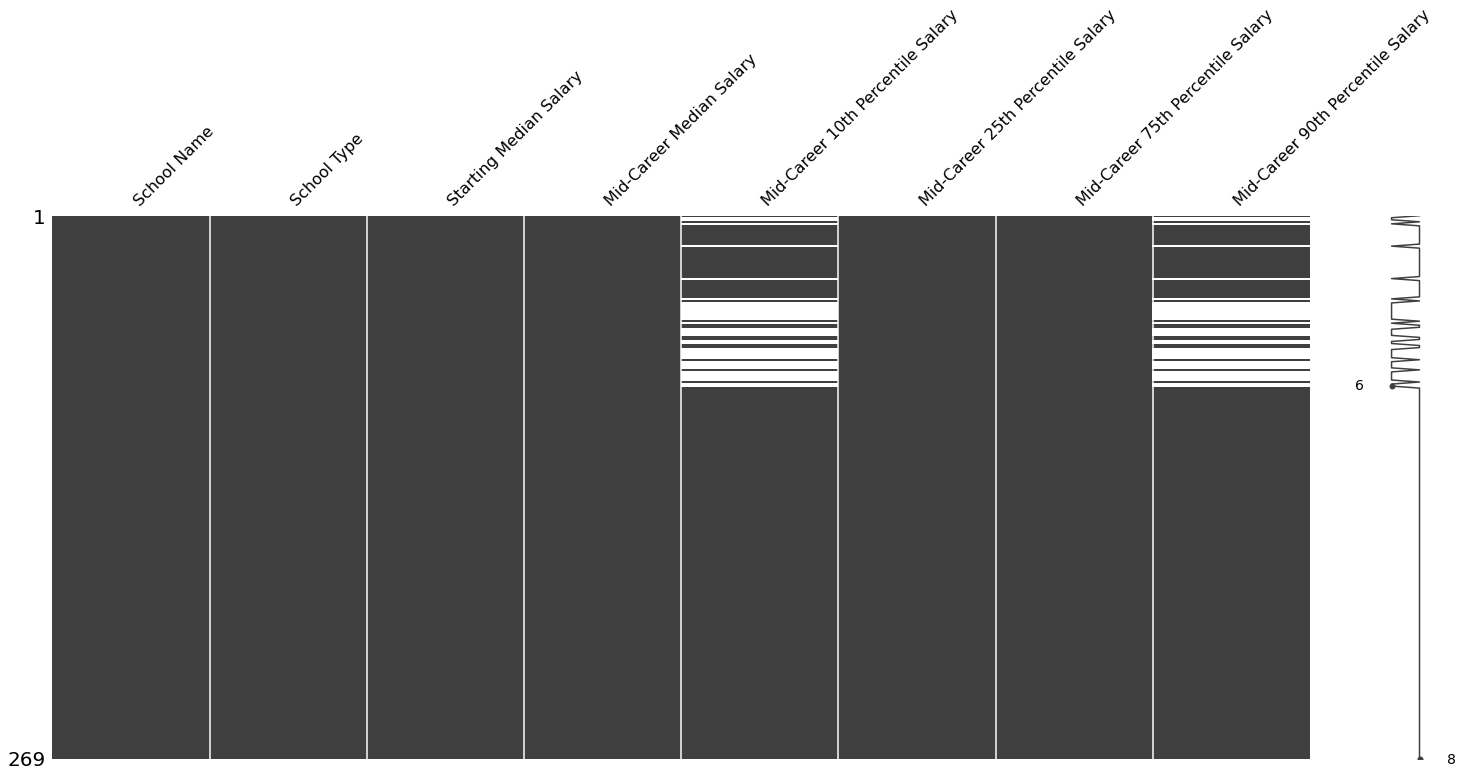

In [19]:
msno.matrix(salariesByCollege_df)
plt.show()

# Other visualization type
#msno.bar(salariesByCollege_df)
#plt.show()

In [20]:
salariesByCollege_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        269 non-null    object
 1   School Type                        269 non-null    object
 2   Starting Median Salary             269 non-null    object
 3   Mid-Career Median Salary           269 non-null    object
 4   Mid-Career 10th Percentile Salary  231 non-null    object
 5   Mid-Career 25th Percentile Salary  269 non-null    object
 6   Mid-Career 75th Percentile Salary  269 non-null    object
 7   Mid-Career 90th Percentile Salary  231 non-null    object
dtypes: object(8)
memory usage: 16.9+ KB


### **Formulas for null values** <a id="11"></a>
<mark>[Return Contents](#0)
<hr>
Totaly 38 data is null. Null data is only available in Mid-Career 10th and in Mid-Career 90th. Now, I will make a formula for null data;

**For Mid-Career 10th Formula = (midcareer + mid_p25) / 3 = mid_p10**

**For Mid-Career 90th Formula = (mid_p75 - mid_p25) + mid_p75**

These formulas give more or less results.

firstly I am changing some column names.

In [21]:
salariesByCollege_df.columns = ['schoolname', 'schooltype', 'starting', 'midcareer', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

In [22]:
salariesByCollege_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolname  269 non-null    object
 1   schooltype  269 non-null    object
 2   starting    269 non-null    object
 3   midcareer   269 non-null    object
 4   mid_p10     231 non-null    object
 5   mid_p25     269 non-null    object
 6   mid_p75     269 non-null    object
 7   mid_p90     231 non-null    object
dtypes: object(8)
memory usage: 16.9+ KB


### Change Data Type <a id="12"></a>
<mark>[Return Contents](#0)
<hr>
let's change the data type.

In [23]:
columns = ['starting', 'midcareer', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for column in columns:
    salariesByCollege_df[column] = salariesByCollege_df[column].str.replace("$","")
    salariesByCollege_df[column] = salariesByCollege_df[column].str.replace(",","")
    salariesByCollege_df[column] = pd.to_numeric(salariesByCollege_df[column])

<ipython-input-23-016dbe41329f>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [26]:
# there are two from some universities.
salariesByCollege_df.schoolname.value_counts().tail(25)

University of California, Riverside (UCR)               1
Ball State University (BSU)                             1
Georgia State University                                1
Ohio State University (OSU)                             1
St. Olaf College                                        1
Auburn University                                       1
Binghamton University                                   1
Mississippi State University (MSU)                      1
University of Washington (UW)                           1
Cal Poly San Luis Obispo                                1
University of Alabama at Birmingham (UAB)               1
California State University, Dominguez Hills (CSUDH)    1
Davidson College                                        1
University of North Carolina at Wilmington (UNCW)       1
Swarthmore College                                      1
University of Colorado - Boulder (UCB)                  1
Northern Illinois University (NIU)                      1
University of 

let's see the data info.

In [25]:
salariesByCollege_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   schoolname  269 non-null    object 
 1   schooltype  269 non-null    object 
 2   starting    269 non-null    float64
 3   midcareer   269 non-null    float64
 4   mid_p10     231 non-null    float64
 5   mid_p25     269 non-null    float64
 6   mid_p75     269 non-null    float64
 7   mid_p90     231 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.9+ KB


### **Fill null values with Formula** <a id="13"></a>
<mark>[Return Contents](#0)
<hr>
let's fix some null columns.

In [34]:
# this code checks to see if the cell is empty.
if salariesByCollege_df.iloc[[1],[7]].isnull().any().any():
    print('This column is null')

This column is null


In [35]:
columns = ['mid_p10','mid_p90']

for i in range(269):
        for column in columns:
            if column == 'mid_p10':
                if salariesByCollege_df.iloc[[i],[4]].isnull().any().any():
                    salariesByCollege_df.iloc[[i],[4]] = (salariesByCollege_df.iloc[[i],[3]].values + salariesByCollege_df.iloc[[i],[5]].values) / 3
            if column == 'mid_p90':
                if salariesByCollege_df.iloc[[i],[7]].isnull().any().any():
                    salariesByCollege_df.iloc[[i],[7]] = (salariesByCollege_df.iloc[[i],[6]].values - salariesByCollege_df.iloc[[i],[5]].values) + salariesByCollege_df.iloc[[i],[6]].values

let's control it.

In [36]:
salariesByCollege_df.head()
# Empty data, not empty.
# it worked.

,schoolname,schooltype,starting,midcareer,mid_p10,mid_p25,mid_p75,mid_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.000000,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,75666.666667,104000.0,161000.0,218000.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,72666.666667,96000.0,180000.0,264000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.000000,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,64733.333333,80200.0,142000.0,203800.0


### Visualization <a id="14"></a>
<mark>[Return Contents](#0)
<hr>
    
### Compare Schools <a id="15"></a>

Now, let's compare the pay for the schools.

In [37]:
# Line Charts
# prepare data frame
df = salariesByCollege_df.sort_values('starting', ascending=False)
df = df.iloc[:55,:]
new_df = df.reset_index()

# Creating trace1
trace1 = go.Scatter(
                    x = new_df.index.values,
                    y = df.starting,
                    mode = "lines",
                    name = "Starting Median Salary",
                    marker = dict(color = 'rgba(324, 97, 98, 0.8)'),
                    text= df.schoolname)
# Creating trace2
trace2 = go.Scatter(
                    x = new_df.index.values,
                    y = df.midcareer,
                    mode = "lines+markers",
                    name = "Mid-Career Median Salary",
                    marker = dict(color = 'rgba(61, 100, 94, 0.8)'),
                    text= df.schoolname)
data = [trace1, trace2]
layout = dict(title = 'Starting Median Salary and Mid-Career Median Salary',
              xaxis= dict(title= 'Universities Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### School Types <a id="16"></a>
<mark>[Return Contents](#0)
<hr>
Let's visualize how many school types there are.

In [38]:
# Basic Bar Chart
data = [go.Bar(
            x=salariesByCollege_df.schooltype.value_counts().index,
            y=salariesByCollege_df.schooltype.value_counts().values
    )]
layout = {"title": "How many school types are there?", 
          "xaxis": {"title": "School Type", }, 
          "yaxis": {"title": "Value"}}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Salary Statistics <a id="17"></a>
<mark>[Return Contents](#0)
<hr>

In [39]:
# Colored Box Plot
# prepare data frame
df1 = salariesByCollege_df.sort_values('starting', ascending=False)

trace0 = go.Box(
    y=df1.starting,
    name = 'Starting Career Median Salary',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df1.midcareer,
    name = 'Mid-Career Median Salary',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df1.mid_p10,
    name = 'Mid-Career 10th Percentile Salary',
    marker = dict(
        color = 'rgb(12, 15, 75)',
    )
)
trace3 = go.Box(
    y=df1.mid_p25,
    name = 'Mid-Career 25th Percentile Salary',
    marker = dict(
        color = 'rgb(12, 100, 190)',
    )
)
trace4 = go.Box(
    y=df1.mid_p75,
    name = 'Mid-Career 75th Percentile Salary',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
trace5 = go.Box(
    y=df1.mid_p90,
    name = 'Mid-Career 90th Percentile Salary',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
data = [trace0, trace1,trace2,trace3,trace4,trace5]
iplot(data)

### **Import Third Data** <a id="18"></a>
<mark>[Return Contents](#0)
<hr>
let's import last data set.

In [40]:
salary_region_df = pd.read_csv('./input/salaries-by-region.csv')
salary_region_df.shape

(320, 8)

In [41]:
salary_region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


### **Change Columns Name** <a id="19"></a>
<mark>[Return Contents](#0)
<hr>
There are empty data as above. But first we have to change the name and data type. Let's the start.

In [42]:
salary_region_df.columns = ['schoolname','region','starting','midcareer','mid_p10','mid_p25','mid_p75','mid_p90']
salary_region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolname  320 non-null    object
 1   region      320 non-null    object
 2   starting    320 non-null    object
 3   midcareer   320 non-null    object
 4   mid_p10     273 non-null    object
 5   mid_p25     320 non-null    object
 6   mid_p75     320 non-null    object
 7   mid_p90     273 non-null    object
dtypes: object(8)
memory usage: 20.1+ KB


### **Convert Data Type** <a id="20"></a>
<mark>[Return Contents](#0)
<hr>
let's the change data type.

In [43]:
regionColumns = ['starting', 'midcareer', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

for column in regionColumns:
    salary_region_df[column] = salary_region_df[column].str.replace("$","")
    salary_region_df[column] = salary_region_df[column].str.replace(",","")
    salary_region_df[column] = pd.to_numeric(salary_region_df[column])

<ipython-input-43-e8c082e3e607>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [44]:
salary_region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   schoolname  320 non-null    object 
 1   region      320 non-null    object 
 2   starting    320 non-null    float64
 3   midcareer   320 non-null    float64
 4   mid_p10     273 non-null    float64
 5   mid_p25     320 non-null    float64
 6   mid_p75     320 non-null    float64
 7   mid_p90     273 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.1+ KB


In [45]:
salary_region_df.head()

,schoolname,region,starting,midcareer,mid_p10,mid_p25,mid_p75,mid_p90
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


### **Fill null values with Formula** <a id="21"></a>
<mark>[Return Contents](#0)
<hr>
I will use the same formula we used above here.

In [46]:
columns = ['mid_p10','mid_p90']

for i in range(269):
        for column in columns:
            if column == 'mid_p10':
                if salary_region_df.iloc[[i],[4]].isnull().any().any():
                    salary_region_df.iloc[[i],[4]] = (salary_region_df.iloc[[i],[3]].values + salary_region_df.iloc[[i],[5]].values) / 3
            if column == 'mid_p90':
                if salary_region_df.iloc[[i],[7]].isnull().any().any():
                    salary_region_df.iloc[[i],[7]] = (salary_region_df.iloc[[i],[6]].values - salary_region_df.iloc[[i],[5]].values) + salary_region_df.iloc[[i],[6]].values

In [47]:
salary_region_df.head()

,schoolname,region,starting,midcareer,mid_p10,mid_p25,mid_p75,mid_p90
0,Stanford University,California,70400.0,129000.0,68400.000000,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,75666.666667,104000.0,161000.0,218000.0
2,Harvey Mudd College,California,71800.0,122000.0,72666.666667,96000.0,180000.0,264000.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.000000,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,53266.666667,54800.0,157000.0,259200.0


### Visualization <a id="22"></a>
<mark>[Return Contents](#0)
<hr>
    
### Region & School Visualization <a id="23"></a>

Let's the visualization.

In [48]:
# Bubble Charts
trace0 = go.Scatter(
    x=salary_region_df.region.value_counts().index,
    y=salary_region_df.region.value_counts().values,
    mode='markers',
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[100, 80, 60, 40,20],
    )
)
layout = {"title": "How many region are there and how many schools are there?", 
          "xaxis": {"title": "Region", }, 
          "yaxis": {"title": "Number of Schools"}}
data = [trace0]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### **Average starting salary for the states** <a id="24"></a>
<mark>[Return Contents](#0)
<hr>
let's find the average starting salary for the states.

In [49]:
california_starting = 0
western_starting = 0
midwestern_starting = 0
southern_starting = 0
northeastern_staring = 0

for i in range(269):
    if salary_region_df.iloc[[i],[1]].values == 'Northeastern':
        northeastern_staring += salary_region_df.iloc[[i],[2]].values
    if salary_region_df.iloc[[i],[1]].values == 'Southern':
        southern_starting += salary_region_df.iloc[[i],[2]].values
    if salary_region_df.iloc[[i],[1]].values == 'Midwestern':
        midwestern_starting += salary_region_df.iloc[[i],[2]].values
    if salary_region_df.iloc[[i],[1]].values == 'Western':
        western_starting += salary_region_df.iloc[[i],[2]].values
    if salary_region_df.iloc[[i],[1]].values == 'California':
        california_starting += salary_region_df.iloc[[i],[2]].values
        
northeastern_staring = int(northeastern_staring/100)
southern_starting = int(southern_starting/79)
midwestern_starting = int(midwestern_starting/71)
western_starting = int(western_starting/42)
california_starting = int(california_starting/28)


data = {'region' : ['Northeastern', 'Southern', 'Midwestern', 'Western','California'],
        'startingmed': [northeastern_staring,southern_starting,midwestern_starting,western_starting,california_starting]}
datas = pd.DataFrame(data, columns=['region','startingmed'])

In [50]:
datas

,region,startingmed
0,Northeastern,26170
1,Southern,44521
2,Midwestern,44225
3,Western,44414
4,California,51032


Let's visualize this datas.

In [51]:
# Customizing Individual Bar Colors
trace0 = go.Bar(
    x=datas.region.values,
    y=datas.startingmed.values,
    marker=dict(
        color=['rgba(24,158,242,1)', 'rgba(44,167,244,1)',
               'rgba(134,185,216,1)', 'rgba(50,104,137,1)',
               'rgba(47,72,88,1)']),
)

data = [trace0]
layout = go.Layout(
    title='According to the state, average starting salary',
    xaxis= {"title": "Region", }, 
    yaxis= {"title": "Average Starting Salary"}
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### **Compare the pay for the schools** <a id="25"></a>
<mark>[Return Contents](#0)
<hr>
Now, let's compare the pay for the schools.

In [52]:
# Line Charts
# prepare data frame
df = salary_region_df.sort_values('starting', ascending=False)
df = df.iloc[:55,:]
new_df = df.reset_index()

# Creating trace1
trace1 = go.Scatter(
                    x = new_df.index.values,
                    y = df.starting,
                    mode = "lines",
                    name = "Starting Median Salary",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.schoolname)
# Creating trace2
trace2 = go.Scatter(
                    x = new_df.index.values,
                    y = df.midcareer,
                    mode = "lines+markers",
                    name = "Mid-Career Median Salary",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.schoolname)
data = [trace1, trace2]
layout = dict(title = 'Starting Median Salary and Mid-Career Median Salary',
              xaxis= dict(title= 'Universities Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Conclusion <a id="26"></a>
<mark>[Return Contents](#0)
<hr>
* If you like it, thank you for you upvotes.
* If you have any question, I will happy to hear it